In [3]:
import os
import shutil
import random
from utils.mamba_out import MambaOut
from utils.train import ImageClassifierTrainer
from functools import partial

from pepeline import noise_generate, TypeNoise,read,ImgFormat

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from timm.layers.drop import DropPath
import numpy as np
import pyvips
import torch.multiprocessing as mp
import kagglehub
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [30]:
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
# print(path)
# os.listdir()
# shutil.move(os.path.join(path,"flowers"),"flowers")
dataset_folder = os.path.join(path,"flowers")
folders = os.listdir(dataset_folder)
train = "train_data/train"
test = "train_data/test"
val = "train_data/val"
os.makedirs(train, exist_ok=True)
os.makedirs(test, exist_ok=True)
os.makedirs(val, exist_ok=True)
n = 0
for index in range(len(folders)):
    folder_imgs = os.path.join(dataset_folder, folders[index])
    img_set = set(os.listdir(folder_imgs))
    test_set = set(list(img_set)[:10])
    img_set = img_set - test_set
    val_set = set(list(img_set)[:16])
    img_set = img_set-val_set 
    for img_name in img_set:
        shutil.copyfile(os.path.join(folder_imgs,img_name),os.path.join(train,f"{n:04}_{index}.jpg"))
        n+=1
    for img_name in val_set:
        shutil.copyfile(os.path.join(folder_imgs,img_name),os.path.join(val,f"{n:04}_{index}.jpg"))
        n+=1
    for img_name in test_set:
        shutil.copyfile(os.path.join(folder_imgs,img_name),os.path.join(test,f"{n:04}_{index}.jpg"))
        n+=1
# print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 225M/225M [00:21<00:00, 11.2MB/s]

Extracting files...


In [69]:
# !uv add kagglehub
!uv pip install numpy==1.25.2



Resolved 1 package in 4ms                                            
Uninstalled 1 package in 14ms
Installed 1 package in 35ms                                 
 - numpy==1.22.4
 + numpy==1.25.2


In [ ]:
model = MambaOut()
trainer = ImageClassifierTrainer(
    model,
    "train_data/train",
    "train_data/val",
    "checkpoints",
    5,
)

# # Загрузка чекпоинта
# trainer.load_checkpoint("checkpoints/best_model.pth")
# Обучение модели
trainer.train()

/run/media/umzi/H/flowernn/utils/train.py:139: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler_g = torch.cuda.amp.GradScaler(enabled=use_amp)
/run/media/umzi/H/flowernn/utils/train.py:203: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:36<00:00,  1.83it/s]


Epoch [1/1000], Train Loss: 2.9508
Validation Loss: 1.5398, Accuracy: 25.00%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.52it/s]


Epoch [2/1000], Train Loss: 2.6716
Validation Loss: 1.4535, Accuracy: 31.25%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.50it/s]


Epoch [3/1000], Train Loss: 2.5768
Validation Loss: 1.3361, Accuracy: 38.75%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.65it/s]


Epoch [4/1000], Train Loss: 2.5380
Validation Loss: 1.2603, Accuracy: 38.75%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.61it/s]


Epoch [5/1000], Train Loss: 2.4831
Validation Loss: 1.2485, Accuracy: 50.00%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.58it/s]


Epoch [6/1000], Train Loss: 2.4434
Validation Loss: 1.2586, Accuracy: 50.00%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.54it/s]


Epoch [7/1000], Train Loss: 2.4078
Validation Loss: 1.0698, Accuracy: 53.75%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.38it/s]


Epoch [8/1000], Train Loss: 2.3541
Validation Loss: 1.0862, Accuracy: 53.75%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.41it/s]


Epoch [9/1000], Train Loss: 2.3319
Validation Loss: 1.0170, Accuracy: 53.75%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.34it/s]


Epoch [10/1000], Train Loss: 2.2923
Validation Loss: 1.0500, Accuracy: 62.50%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.23it/s]


Epoch [11/1000], Train Loss: 2.2492
Validation Loss: 0.9461, Accuracy: 62.50%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.28it/s]


Epoch [12/1000], Train Loss: 2.2212
Validation Loss: 0.8438, Accuracy: 65.00%
Best checkpoint saved!
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.26it/s]


Epoch [13/1000], Train Loss: 2.1923
Validation Loss: 0.9697, Accuracy: 51.25%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.38it/s]


Epoch [14/1000], Train Loss: 2.1610
Validation Loss: 0.9085, Accuracy: 60.00%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [15/1000], Train Loss: 2.1618
Validation Loss: 0.9177, Accuracy: 58.75%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.18it/s]


Epoch [16/1000], Train Loss: 2.1398
Validation Loss: 0.8798, Accuracy: 66.25%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:13<00:00,  5.03it/s]


Epoch [17/1000], Train Loss: 2.1205
Validation Loss: 0.8802, Accuracy: 57.50%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:15<00:00,  4.31it/s]


Epoch [18/1000], Train Loss: 2.1155
Validation Loss: 0.9099, Accuracy: 65.00%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:15<00:00,  4.22it/s]


Epoch [19/1000], Train Loss: 2.0855
Validation Loss: 0.8960, Accuracy: 60.00%
Regular checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:15<00:00,  4.38it/s]


Epoch [20/1000], Train Loss: 2.0986


Loaded checkpoint from epoch 131 with loss 0.3955


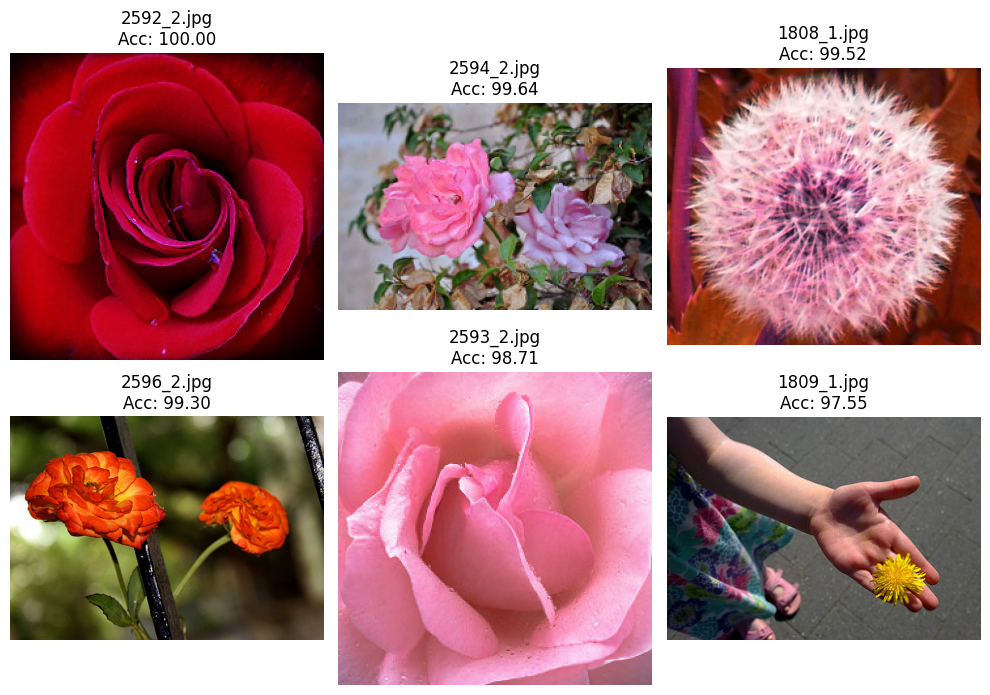

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def load_checkpoint(model, checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location="cpu")
    # print(checkpoint.keys())
    model_state = checkpoint["model_state_dict"]
    # print(f"Loaded checkpoint from epoch {checkpoint['epoch']} with loss {checkpoint['loss']:.4f}")
    # print(model_state.keys())
    for key in list(model_state.keys()):
        if (
            key not in model.state_dict()
            or model.state_dict()[key].size() != model_state[key].size()
        ):
            print(f"Skipping parameter: {key}")
            del model_state[key]
    print(
        f"Loaded checkpoint from epoch {checkpoint['epoch']} with loss {checkpoint['loss']:.4f}"
    )
    model.load_state_dict(model_state, strict=False)
    return model
def image2tensor(
    value: list[np.ndarray] | np.ndarray,
    out_type: torch.dtype = torch.float32,
):
    def _to_tensor(img: np.ndarray) -> torch.Tensor:
        if img.dtype == np.uint8:
            img = img.astype(np.float32) / 255.0

        if len(img.shape) == 2:
            tensor = torch.from_numpy(img[None, ...])
        else:
            tensor = torch.from_numpy(img.transpose(2, 0, 1))

        if tensor.dtype != out_type:
            tensor = tensor.to(out_type)

        return tensor

    if isinstance(value, list):
        return [_to_tensor(i) for i in value]
    else:
        return _to_tensor(value)

def plot_top5_images(folder_path, matches):
    """
    Отображает оригинальное изображение и топ-5 похожих в формате 2x3.
    :param folder_path: путь к папке с изображениями
    :param matches: список пар [accuracy, filename]
    """
    if len(matches) < 6:
        raise ValueError("Нужно минимум 6 изображений в списке: 1 оригинал и 5 похожих")

    fig, axes = plt.subplots(2, 3, figsize=(10, 7))

    for i, (acc, name) in enumerate(matches[:6]):
        img_path = os.path.join(folder_path, name)
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Файл {img_path} не найден")

        img = mpimg.imread(img_path)
        row, col = divmod(i, 3)

        axes[row, col].imshow(img)
        axes[row, col].set_title(f"{name}\nAcc: {acc:.2f}")
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()
model = load_checkpoint(
    MambaOut(),
    "/run/media/umzi/H/flowernn/checkpoints/best_model.pth",
).eval()


img = image2tensor(
    read("/run/media/umzi/H/flowernn/train_data/test/2592_2.jpg", format=ImgFormat.F32)
)[None, ...]
_, emb1 = model(img)
folder = "/run/media/umzi/H/flowernn/train_data/test/"
img_list = os.listdir(folder)
emb_list = []
for img_name in img_list:
    img = image2tensor(read(os.path.join(folder, img_name), format=ImgFormat.F32))[
        None, ...
    ]
    _, emb2 = model(img)
    # emb2 = F.normalize(emb2, p=2, dim=1)
    emb_list.append([((F.cosine_similarity(emb1, emb2)) * 100).cpu().item(), img_name])
sorted_data = sorted(emb_list, key=lambda x: x[0], reverse=True)
plot_top5_images(folder,sorted_data)